In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [23]:
data = pd.read_csv('cardio_data_processed.csv')

In [24]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [26]:
data.isna().sum()

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

In [27]:
data.duplicated().sum()

0

In [28]:
data =data.drop('bp_category',axis=1)
data = data.drop('id',axis=1)

In [29]:
y = data['bp_category_encoded']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [30]:
data['bp_category_encoded']= y_encoded

In [31]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_encoded
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,1
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,2
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,2
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,3


In [32]:
X = data.drop('bmi', axis=1)
y = data['bmi']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((47743, 14), (20462, 14), (47743,), (20462,))

In [35]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2) # Number of digits of precision for float(2) >>> 23.93 
# precision (default 8) >> int or none >> 

In [37]:
print(y_pred)

[23.93 28.45 22.73 ... 26.89 35.72 29.48]


In [38]:
accuracy = r2_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 89.99%


In [39]:
y_test_np = y_test.values.reshape(len(y_test), 1)
# print(X_test)
# print(y_pred)
# print(y_test_np)
# print(y_pred)
# print(y_pred.reshape(len(y_pred),1))
# print(y_test_np.reshape(len(y_test_np),1))
# print(y_pred.reshape(len(y_pred),1), y_test_np.reshape(len(y_test_np),1))
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test_np.reshape(len(y_test_np),1)),1))

[[23.93 25.14]
 [28.45 28.12]
 [22.73 23.05]
 ...
 [26.89 26.44]
 [35.72 34.6 ]
 [29.48 29.3 ]]


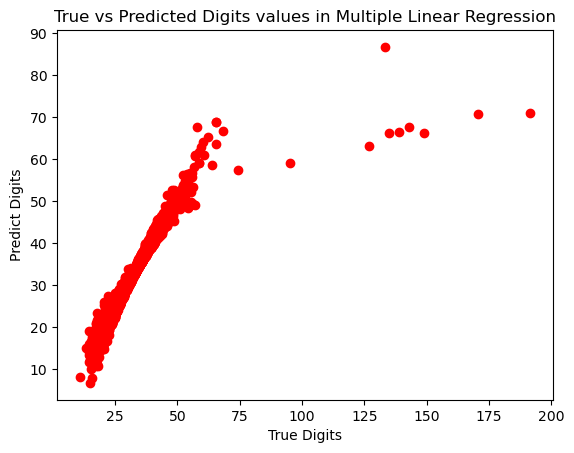

In [40]:
# plt.scatter(y_test, y_pred, color='red') 
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('True Digits')
plt.ylabel('Predict Digits')
plt.title('True vs Predicted Digits values in Multiple Linear Regression')
plt.show()